In [1]:
import numpy as np 
import pandas as pd 
from tensorflow import keras
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

In [2]:
DATA_DIR = './Dataset'
BATCH_SIZE = 50
IMG_SIZE = (128,128)
SEED = 42

In [19]:
training_images = image_dataset_from_directory(
        directory=DATA_DIR,
        labels="inferred", 
        label_mode="categorical", 
        batch_size=BATCH_SIZE, 
        image_size=IMG_SIZE,
        seed=SEED,
        validation_split=0.2,
        subset="training"
    )

testing_images = image_dataset_from_directory(
        directory=DATA_DIR,
        labels="inferred", 
        label_mode="categorical", 
        batch_size=BATCH_SIZE, 
        image_size=IMG_SIZE,
        seed=SEED,
        validation_split=0.2,
        subset="validation"
    )


Found 10934 files belonging to 2 classes.
Using 8748 files for training.
Found 10934 files belonging to 2 classes.
Using 2186 files for validation.


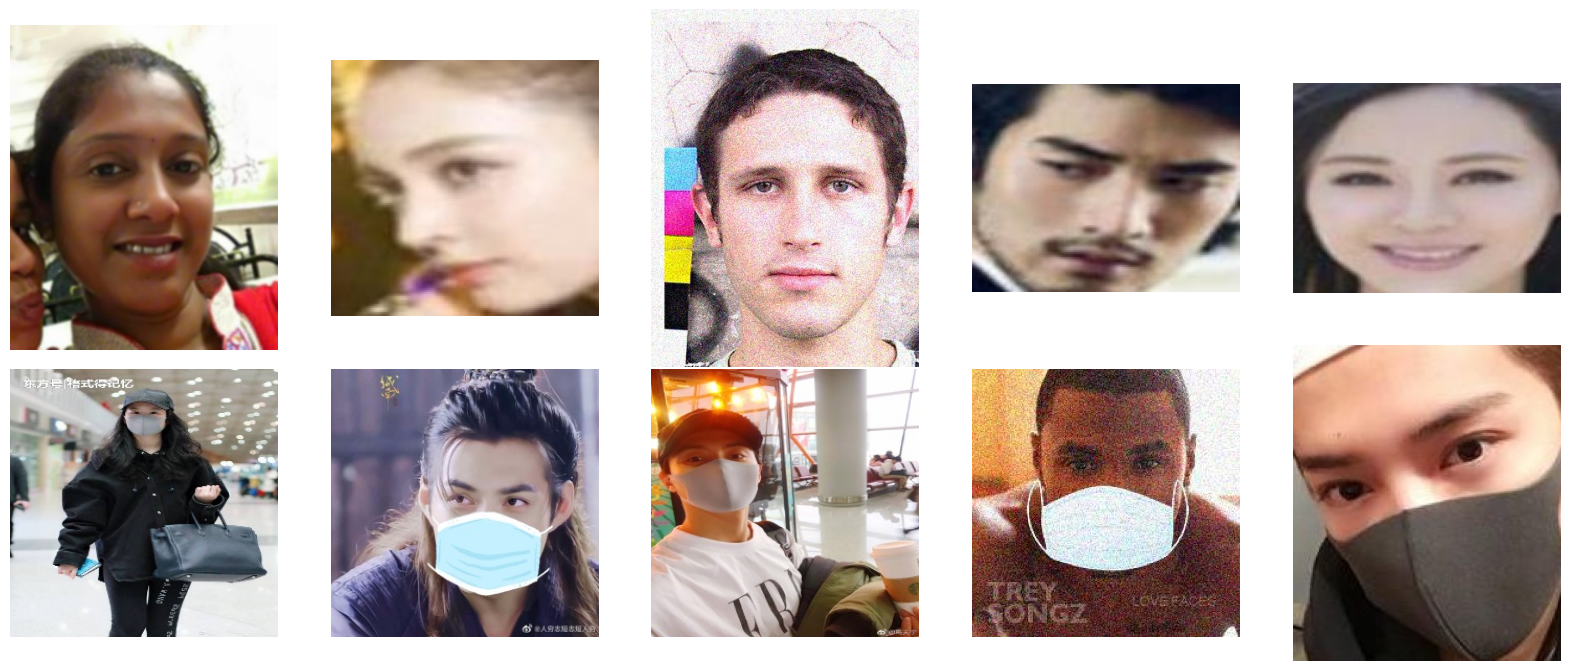

In [20]:
# Here we will display some of the images

sns.set()
sns.set_theme(style="darkgrid")

f = plt.figure(figsize=(20, 15))
without_mask_path = './Dataset/without_mask'
with_mask_path = './Dataset/with_mask'


for i in range(1,6):
    filename = random.choice(os.listdir(with_mask_path))
    image = plt.imread(os.path.join(with_mask_path,filename))
    x = f.add_subplot(1,5,i)
    x.axis(False)
    x.imshow(image)

for i in range(1,6):
    filename = random.choice(os.listdir(without_mask_path))
    image = plt.imread(os.path.join(without_mask_path,filename))
    x = f.add_subplot(2,5,i)
    x.axis(False)
    x.imshow(image)

plt.show()

In [21]:
base_model = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

base_model.trainable = False
    
model = keras.Sequential([
    # Adding the base
    base_model,
    
    # Adding the head
    Flatten(),
    Dense(units=2, activation="sigmoid")
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 4, 4, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │        16,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,040,770 (76.45 MB)

 Trainable params: 16,386 (64.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [22]:
# Compiling the model with the Adam optimizer and using binary_crossentropy as the loss function
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [24]:
history = model.fit(training_images, epochs=20, steps_per_epoch=20, validation_data=testing_images)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 122s 6s/step - accuracy: 0.8034 - loss: 2.4609 - val_accuracy: 0.9812 - val_loss: 0.3318
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 125s 6s/step - accuracy: 0.9832 - loss: 0.1865 - val_accuracy: 0.9886 - val_loss: 0.2553
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 128s 7s/step - accuracy: 0.9846 - loss: 0.2955 - val_accuracy: 0.9904 - val_loss: 0.1555
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 131s 7s/step - accuracy: 0.9922 - loss: 0.2246 - val_accuracy: 0.9913 - val_loss: 0.1317
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 129s 7s/step - accuracy: 0.9932 - loss: 0.0919 - val_accuracy: 0.9922 - val_loss: 0.1171
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 130s 7s/step - accuracy: 0.9935 - loss: 0.1864 - val_accuracy: 0.9922 - val_loss: 0.1447
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 129s 7s/step - accuracy: 0.9936 - loss: 0.0804 - val_accuracy: 0.9922 - val_loss: 0.1217
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 130s 7s/step - accuracy: 0.9788 - loss: 0.3207 - val_accuracy: 0.9927 - v

c:\Users\91908\anaconda3\envs\Tensorflow_Env\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 119s 6s/step - accuracy: 0.9933 - loss: 0.1438 - val_accuracy: 0.9890 - val_loss: 0.1535
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 130s 7s/step - accuracy: 0.9896 - loss: 0.1193 - val_accuracy: 0.9922 - val_loss: 0.1242
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 129s 7s/step - accuracy: 0.9893 - loss: 0.1144 - val_accuracy: 0.9899 - val_loss: 0.1564
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 129s 7s/step - accuracy: 0.9956 - loss: 0.1458 - val_accuracy: 0.9950 - val_loss: 0.0940
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 128s 7s/step - accuracy: 0.9992 - loss: 0.0383 - val_accuracy: 0.9954 - val_loss: 0.1421
Epoch 14/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 129s 7s/step - accuracy: 0.9978 - loss: 0.1014 - val_accuracy: 0.9931 - val_loss: 0.0889
Epoch 15/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 129s 7s/step - accuracy: 0.9950 - loss: 0.0618 - val_accuracy: 0.9927 - val_loss: 0.1113
Epoch 16/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 128s 7s/step - accuracy: 0.9935 - loss: 0.1175 - val_accuracy: 0.9918 - val_l

In [25]:
model.evaluate(testing_images)

44/44 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.9937 - loss: 0.1423


[0.12379451096057892, 0.9935956001281738]

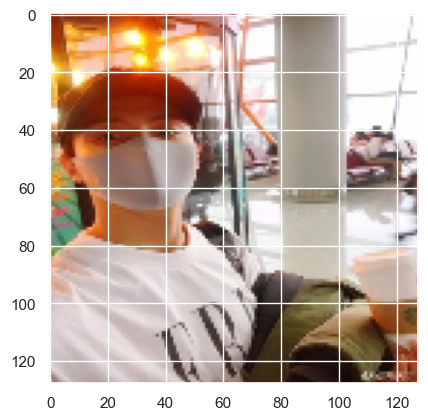

In [28]:
# Loading a random image from the WithMask data to check how the model predicts the classification
random_image = keras.preprocessing.image.load_img(
    "./Dataset/with_mask/250.jpg", target_size=([128,128,3])
)
random_image_array = keras.preprocessing.image.img_to_array(random_image)
random_image_array = np.array([random_image_array])
plt.imshow(random_image)

In [29]:
model.predict(random_image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step


array([[1., 0.]], dtype=float32)

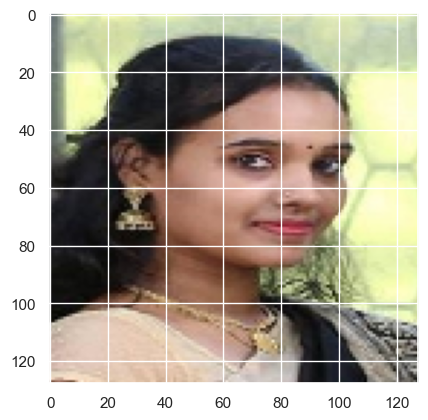

In [30]:
# Loading a random image from the WithoutMask data to check how the model predicts the classification
random_image = keras.preprocessing.image.load_img(
    "./Dataset/without_mask/621.jpg", target_size=([128,128,3])
)
random_image_array = keras.preprocessing.image.img_to_array(random_image)
random_image_array = np.array([random_image_array])
plt.imshow(random_image)

In [31]:
model.predict(random_image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


array([[0., 1.]], dtype=float32)

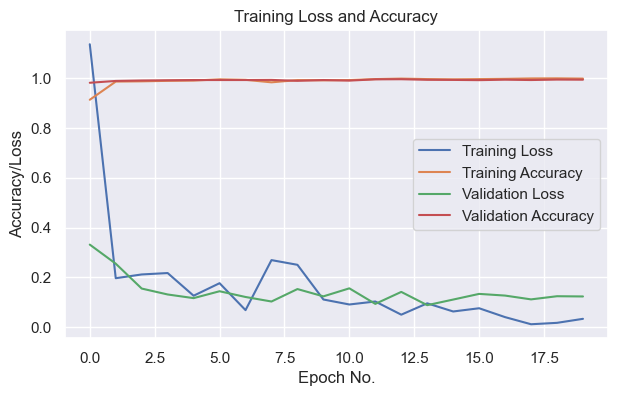

In [34]:
sns.set(rc={'figure.figsize':(7,4)})
sns.set_theme(style="darkgrid")

training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

no_of_epochs = range(len(training_loss))

sns.lineplot(x = no_of_epochs, y = training_loss, label = "Training Loss")
sns.lineplot(x = no_of_epochs, y = training_accuracy, label = "Training Accuracy")
sns.lineplot(x = no_of_epochs, y = validation_loss, label = "Validation Loss")
sns.lineplot(x = no_of_epochs, y = validation_accuracy, label = "Validation Accuracy")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch No.")
plt.ylabel("Accuracy/Loss")
plt.show()